In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
# unzip data.zip

--2025-12-01 02:06:10--  https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/405934815/e712cf72-f851-44e0-9c05-e711624af985?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-01T02%3A51%3A18Z&rscd=attachment%3B+filename%3Ddata.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-01T01%3A50%3A39Z&ske=2025-12-01T02%3A51%3A18Z&sks=b&skv=2018-11-09&sig=HJC0ydRYVV3ZkAEfEFG9gqaAPbiOewhSoTG%2FtHbTBTQ%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NDU1NjU3MCwibmJmIjoxNzY0NTU0NzcwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5i

In [4]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
   creating: data/test/
   creating: data/test/curly/
  inflating: data/test/curly/03312ac556a7d003f7570657f80392c34.jpg  
  inflating: data/test/curly/106dfcf4abe76990b585b2fc2e3c9f884.jpg  
  inflating: data/test/curly/1a9dbe23a0d95f1c292625960e4509184.jpg  
  inflating: data/test/curly/341ea26e6677b655f8447af56073204a4.jpg  
  inflating: data/test/curly/61aPFVrm42L._SL1352_.jpg  
  inflating: data/test/curly/6d8acb0fe980774ea4e5631198587f45.png  
  inflating: data/test/curly/7f5649a0c33a2b334f23221a52c16b9b.jpg  
  inflating: data/test/curly/90146673.jpg  
  inflating: data/test/curly/9b3608e01d78fbabc9fb0719323d507f4.jpg  
  inflating: data/test/curly/b171c99161f3cffc12d4b74488ef2fc6.jpg  
  inflating: data/test/curly/blogger_one.jpg  
  inflating: data/test/curly/c03ca1590aa4df74e922ad8257305a2b.jpg  
  inflating: data/test/curly/c1b89bb4f86a3478ec20ce1f63f003c1.jpg  
  inflating: data/test/curly/c5.jpg  
  inflating: data/test/curly/

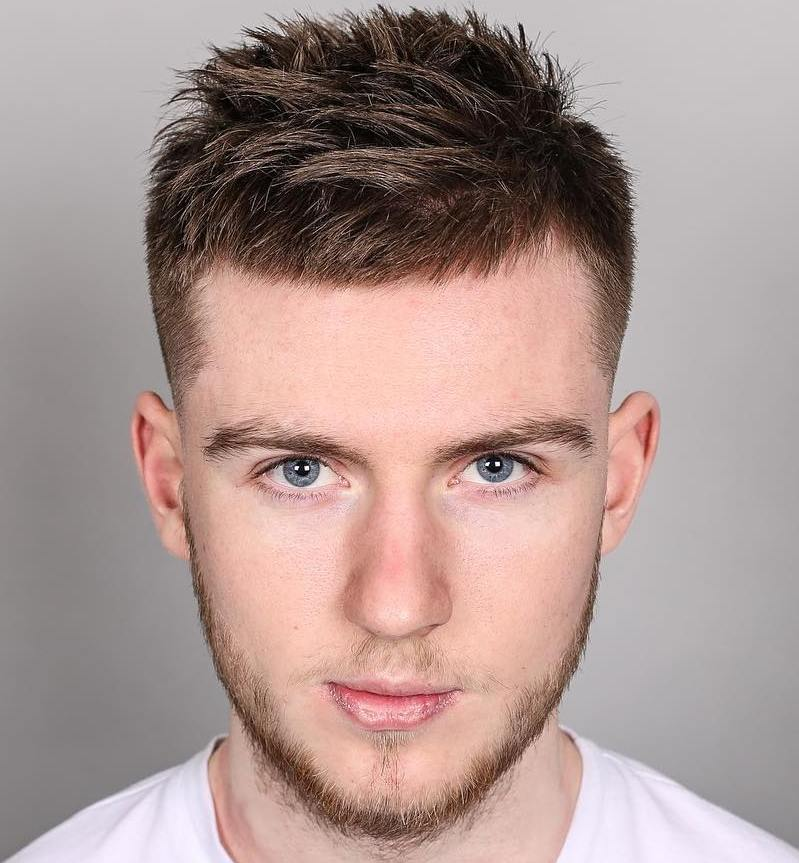

In [5]:
from tensorflow.keras.preprocessing.image import load_img

path = '/content/sample_data/data/train/straight/1-short-spiky-mens-haircut.jpg'
# path = '/content/data/train/curly/1-curly-hair-with-bangs-CYFg6l_Ls4-.jpg'
load_img(path)

In [7]:
# Reproducibility

import os
import random
import numpy as np
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


Model
For this homework we will use Convolutional Neural Network (CNN). We'll use PyTorch.

You need to develop the model with following structure:

The shape for input should be (3, 200, 200) (channels first format in PyTorch)
Next, create a convolutional layer (nn.Conv2d):
Use 32 filters (output channels)
Kernel size should be (3, 3) (that's the size of the filter)
Use 'relu' as activation
Reduce the size of the feature map with max pooling (nn.MaxPool2d)
Set the pooling size to (2, 2)
Turn the multi-dimensional result into vectors using flatten or view
Next, add a nn.Linear layer with 64 neurons and 'relu' activation
Finally, create the nn.Linear layer with 1 neuron - this will be the output
The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use torch.optim.SGD with the following parameters:

torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)

In [21]:
import torch
import torch.nn as nn

class HairNet(nn.Module):
    def __init__(self):
        super(HairNet, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # After pooling: 200x200 → 100x100
        self.flatten = nn.Flatten()

        self.fc = nn.Sequential(
            nn.Linear(32 * 100 * 100, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x    # logits (no sigmoid)


In [22]:
model = HairNet().to(device)


In [24]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.002
    maximize: False
    momentum: 0.8
    nesterov: False
    weight_decay: 0
)

### Question 1

Which loss function you will use?

* `nn.BCEWithLogitsLoss()`

In [28]:
from torchsummary import summary
summary(model, input_size=(3, 200, 200))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 200, 200]             896
              ReLU-2         [-1, 32, 200, 200]               0
         MaxPool2d-3         [-1, 32, 100, 100]               0
           Flatten-4               [-1, 320000]               0
            Linear-5                   [-1, 64]      20,480,064
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 1]              65
Total params: 20,481,025
Trainable params: 20,481,025
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 24.42
Params size (MB): 78.13
Estimated Total Size (MB): 103.00
----------------------------------------------------------------


### Question 2

In PyTorch, you can find the total number of parameters using:

* 896
* 11214912
* 15896912
* 20073473   --

In [25]:
# Generators and Training

train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [26]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_path = "/content/sample_data/data/train"
val_path   = "/content/sample_data/data/test"

train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path,   transform=train_transforms)

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
validation_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)


In [27]:
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train

    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    # Validation
    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    val_epoch_loss = val_running_loss / len(val_dataset)
    val_epoch_acc = correct_val / total_val

    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss={epoch_loss:.4f}, Acc={epoch_acc:.4f}, "
          f"ValLoss={val_epoch_loss:.4f}, ValAcc={val_epoch_acc:.4f}")


Epoch 1/10, Loss=0.6209, Acc=0.6412, ValLoss=0.6848, ValAcc=0.6368
Epoch 2/10, Loss=0.5651, Acc=0.7100, ValLoss=0.6085, ValAcc=0.6567
Epoch 3/10, Loss=0.5035, Acc=0.7238, ValLoss=0.6010, ValAcc=0.6517
Epoch 4/10, Loss=0.4653, Acc=0.7750, ValLoss=0.6079, ValAcc=0.6766
Epoch 5/10, Loss=0.3795, Acc=0.8287, ValLoss=0.6093, ValAcc=0.6866
Epoch 6/10, Loss=0.3451, Acc=0.8488, ValLoss=0.6751, ValAcc=0.6866
Epoch 7/10, Loss=0.2557, Acc=0.8962, ValLoss=0.7078, ValAcc=0.6915
Epoch 8/10, Loss=0.2098, Acc=0.9187, ValLoss=0.7098, ValAcc=0.7065
Epoch 9/10, Loss=0.1629, Acc=0.9450, ValLoss=0.9517, ValAcc=0.6965
Epoch 10/10, Loss=0.1534, Acc=0.9437, ValLoss=1.4618, ValAcc=0.6667


In [34]:
import numpy as np

train_accs = np.array(history['acc'])
train_losses = np.array(history['loss'])

median_train_acc = float(np.median(train_accs))
std_train_loss = float(np.std(train_losses, ddof=0))

print("Median train acc:", median_train_acc)
print("Std train loss:", std_train_loss)


Median train acc: 0.83875
Std train loss: 0.16033580948574372


### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.84 --

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.007

In [35]:
# Data Augmentation

augmented_train_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.RandomRotation(50),
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [36]:
# 10 epochs

batch_size = 10
t_path = "/content/sample_data/data/train"

train_dataset = datasets.ImageFolder(t_path, transform=augmented_train_transforms)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [38]:
val_losses_aug = np.array(history['val_loss'][:10])
val_accs_aug = np.array(history['val_acc'][:10])
print("Q5 mean test loss:", np.mean(val_losses_aug))
print("Q6 mean val acc last 5:", np.mean(val_accs_aug[-5:]))

Q5 mean test loss: 0.7617664658645196
Q6 mean val acc last 5: 0.6895522388059702
